### Explaining Neural Networks Model using SHAP

#### Census income classification with Keras

In [1]:
import matplotlib.pyplot as plt
import shap
import numpy as np

# print the JS visualization code to the notebook
shap.initjs()

### Load dataset

In [2]:
X, y = shap.datasets.adult()

In [3]:
X.head()

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5


In [4]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581646,13.640442,17.0,28.0,37.0,48.0,90.0
Workclass,32561.0,3.868892,1.455960,0.0,4.0,4.0,4.0,8.0
Education-Num,32561.0,10.080679,2.572562,1.0,9.0,10.0,12.0,16.0
Marital Status,32561.0,2.611836,1.506222,0.0,2.0,2.0,4.0,6.0
Occupation,32561.0,6.572740,4.228857,0.0,3.0,7.0,10.0,14.0
Relationship,32561.0,2.494518,1.758232,0.0,0.0,3.0,4.0,5.0
Race,32561.0,3.665858,0.848806,0.0,4.0,4.0,4.0,4.0
Sex,32561.0,0.669205,0.470506,0.0,0.0,1.0,1.0,1.0
Capital Gain,32561.0,1077.648804,7385.911621,0.0,0.0,0.0,0.0,99999.0
Capital Loss,32561.0,87.303833,403.014771,0.0,0.0,0.0,0.0,4356.0


In [5]:
X.isnull().sum()

Age               0
Workclass         0
Education-Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per week    0
Country           0
dtype: int64

In [6]:
y

array([False, False, False, ..., False, False,  True])

In [7]:
np.unique(y)

array([False,  True])

In [8]:
y = y.astype(int)
y

array([0, 0, 0, ..., 0, 0, 1])

In [9]:
np.unique(y)

array([0, 1])

In [10]:
X_display, y_display = shap.datasets.adult(display=True)

In [11]:
X_display.head()

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


In [12]:
y_display

array([False, False, False, ..., False, False,  True])

#### Normalise data (this is important for model convergence)

In [13]:
X.dtypes

Age               float32
Workclass            int8
Education-Num     float32
Marital Status       int8
Occupation           int8
Relationship        int64
Race                 int8
Sex                  int8
Capital Gain      float32
Capital Loss      float32
Hours per week    float32
Country              int8
dtype: object

In [14]:
X.dtypes.index

Index(['Age', 'Workclass', 'Education-Num', 'Marital Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Country'],
      dtype='object')

In [15]:
X.dtypes.values

array([dtype('float32'), dtype('int8'), dtype('float32'), dtype('int8'),
       dtype('int8'), dtype('int64'), dtype('int8'), dtype('int8'),
       dtype('float32'), dtype('float32'), dtype('float32'),
       dtype('int8')], dtype=object)

In [16]:
dtypes = list(zip(X.dtypes.index, map(str, X.dtypes)))
dtypes

[('Age', 'float32'),
 ('Workclass', 'int8'),
 ('Education-Num', 'float32'),
 ('Marital Status', 'int8'),
 ('Occupation', 'int8'),
 ('Relationship', 'int64'),
 ('Race', 'int8'),
 ('Sex', 'int8'),
 ('Capital Gain', 'float32'),
 ('Capital Loss', 'float32'),
 ('Hours per week', 'float32'),
 ('Country', 'int8')]

In [17]:
for k, dtype in dtypes:
    print(f"K: {k}, Dtype: {dtype}")
    X[k]-= X[k].mean()
    X[k] /= X[k].std()

K: Age, Dtype: float32
K: Workclass, Dtype: int8
K: Education-Num, Dtype: float32
K: Marital Status, Dtype: int8
K: Occupation, Dtype: int8
K: Relationship, Dtype: int64
K: Race, Dtype: int8
K: Sex, Dtype: int8
K: Capital Gain, Dtype: float32
K: Capital Loss, Dtype: float32
K: Hours per week, Dtype: float32
K: Country, Dtype: int8


In [18]:
X.head()

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,0.030670,2.150546,1.134791,0.921620,-1.317789,-1.418765,0.393661,0.703061,0.148438,-0.216627,-0.035427,0.291564
1,0.837095,1.463713,1.134791,-0.406206,-0.608377,0.856248,0.393661,0.703061,-0.145906,-0.216627,-2.222028,0.291564
2,-0.042641,0.090049,-0.420079,-1.734032,-0.135436,-1.418765,0.393661,0.703061,-0.145906,-0.216627,-0.035427,0.291564
3,1.057029,0.090049,-1.197514,-0.406206,-0.135436,0.856248,-1.962591,0.703061,-0.145906,-0.216627,-0.035427,0.291564
4,-0.775755,0.090049,1.134791,-0.406206,0.810446,1.425001,-1.962591,-1.422309,-0.145906,-0.216627,-0.035427,-4.054160


In [19]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,5.646891e-08,0.999997,-1.582180,-0.775755,-0.115953,0.690472,3.769550
Workclass,32561.0,6.786609e-17,1.000000,-2.657280,0.090049,0.090049,0.090049,2.837378
Education-Num,32561.0,1.640176e-07,1.000034,-3.529819,-0.420079,-0.031361,0.746074,2.300944
Marital Status,32561.0,-1.433699e-16,1.000000,-1.734032,-0.406206,-0.406206,0.921620,2.249446
Occupation,32561.0,1.100915e-16,1.000000,-1.554259,-0.844848,0.101034,0.810446,1.756328
Relationship,32561.0,-1.047451e-17,1.000000,-1.418765,-1.418765,0.287495,0.856248,1.425001
Race,32561.0,-1.588634e-16,1.000000,-4.318843,0.393661,0.393661,0.393661,0.393661
Sex,32561.0,-5.346364e-17,1.000000,-1.422309,-1.422309,0.703061,0.703061,0.703061
Capital Gain,32561.0,1.288709e-09,0.999992,-0.145906,-0.145906,-0.145906,-0.145906,13.393249
Capital Loss,32561.0,-1.487874e-08,0.999840,-0.216627,-0.216627,-0.216627,-0.216627,10.591908


### Split Data

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                      y,
                                                      test_size=0.2, 
                                                      random_state=7)

In [21]:
X_train

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
12011,0.910406,0.090049,-0.031361,-1.734032,-0.135436,-1.418765,0.393661,-1.422309,-0.145906,-0.216627,-0.035427,-2.009114
23599,0.910406,-1.970447,1.523509,2.249446,1.283387,-0.850012,0.393661,0.703061,-0.145906,-0.216627,0.774425,-3.670714
23603,-1.288934,0.090049,0.357356,0.921620,-0.844848,0.287495,-1.962591,0.703061,-0.145906,-0.216627,-0.035427,0.291564
6163,-0.995689,0.090049,-0.031361,0.921620,1.283387,0.287495,0.393661,0.703061,-0.145906,-0.216627,-1.331191,0.291564
14883,0.690472,0.090049,1.134791,-1.734032,-1.317789,0.287495,0.393661,0.703061,-0.145906,-0.216627,-0.197398,0.291564
...,...,...,...,...,...,...,...,...,...,...,...,...
5699,-1.142312,0.090049,-0.420079,0.921620,1.283387,-1.418765,0.393661,0.703061,-0.145906,-0.216627,-0.035427,0.291564
10742,-0.115953,0.090049,-0.420079,-0.406206,0.101034,0.856248,0.393661,0.703061,-0.145906,-0.216627,-0.035427,0.291564
16921,-0.849066,1.463713,-1.974949,-0.406206,-0.844848,0.856248,0.393661,0.703061,-0.145906,-0.216627,-0.035427,0.291564
25796,0.543850,0.090049,2.300944,-0.406206,0.810446,0.856248,0.393661,0.703061,-0.145906,5.775709,1.179351,0.291564


### Train Keras Model

In [22]:
from keras.layers import Dense, Dropout, Embedding, Flatten, Input, concatenate
from keras.models import Model
import keras

2025-11-12 03:28:00.804680: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-12 03:28:00.804773: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-12 03:28:00.808386: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-12 03:28:00.831288: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-12 03:28:03.931061: W tensorflow/compiler/tf2

In [23]:
model_input_shape = X_train.shape[1], 
model_input_shape

(12,)

In [24]:
model = keras.Sequential([
    keras.layers.Input(shape=(model_input_shape), name="input_layer"),
    keras.layers.Dense(100, activation="relu", name="dense_layer_1"),
    keras.layers.Dropout(0.5, name="dropout_layer"),
    keras.layers.Dense(1, activation="sigmoid", name="output_layer"),
])

2025-11-12 03:28:06.183661: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1 (Dense)       (None, 100)               1300      
                                                                 
 dropout_layer (Dropout)     (None, 100)               0         
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 1401 (5.47 KB)
Trainable params: 1401 (5.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling the model

In [26]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [27]:
model.weights

[<tf.Variable 'dense_layer_1/kernel:0' shape=(12, 100) dtype=float32, numpy=
 array([[-0.01492386, -0.18175933,  0.11815712, ...,  0.00833586,
         -0.06945747, -0.18876725],
        [-0.19647364,  0.16159004, -0.1529362 , ...,  0.01243934,
         -0.13729   ,  0.19975653],
        [-0.04195087, -0.2151687 , -0.05763061, ...,  0.13442695,
         -0.04562373, -0.09655605],
        ...,
        [ 0.16879645, -0.18888463,  0.01606846, ..., -0.20609824,
          0.1449773 , -0.0827868 ],
        [ 0.00067352, -0.15048055, -0.16340859, ...,  0.17094734,
          0.0540196 ,  0.17649743],
        [ 0.22380856, -0.10883927, -0.17460874, ..., -0.15795323,
          0.18721297,  0.03327021]], dtype=float32)>,
 <tf.Variable 'dense_layer_1/bias:0' shape=(100,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [28]:
model.compiled_loss

In [29]:
model.compiled_metrics

In [30]:
model.trainable_weights

[<tf.Variable 'dense_layer_1/kernel:0' shape=(12, 100) dtype=float32, numpy=
 array([[-0.01492386, -0.18175933,  0.11815712, ...,  0.00833586,
         -0.06945747, -0.18876725],
        [-0.19647364,  0.16159004, -0.1529362 , ...,  0.01243934,
         -0.13729   ,  0.19975653],
        [-0.04195087, -0.2151687 , -0.05763061, ...,  0.13442695,
         -0.04562373, -0.09655605],
        ...,
        [ 0.16879645, -0.18888463,  0.01606846, ..., -0.20609824,
          0.1449773 , -0.0827868 ],
        [ 0.00067352, -0.15048055, -0.16340859, ...,  0.17094734,
          0.0540196 ,  0.17649743],
        [ 0.22380856, -0.10883927, -0.17460874, ..., -0.15795323,
          0.18721297,  0.03327021]], dtype=float32)>,
 <tf.Variable 'dense_layer_1/bias:0' shape=(100,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

### Train Model

In [31]:
model_history = model.fit(
    X_train, 
    y_train,
    epochs=50,
    batch_size=512,
    shuffle=True,
    validation_data=(X_valid, y_valid)
)

Epoch 1/50
51/51 [==============================] - 3s 19ms/step - loss: 0.4825 - accuracy: 0.7839 - val_loss: 0.3898 - val_accuracy: 0.8290
Epoch 2/50
51/51 [==============================] - 1s 10ms/step - loss: 0.3861 - accuracy: 0.8252 - val_loss: 0.3543 - val_accuracy: 0.8377
Epoch 3/50
51/51 [==============================] - 0s 9ms/step - loss: 0.3646 - accuracy: 0.8317 - val_loss: 0.3431 - val_accuracy: 0.8403
Epoch 4/50
51/51 [==============================] - 1s 10ms/step - loss: 0.3537 - accuracy: 0.8363 - val_loss: 0.3376 - val_accuracy: 0.8428
Epoch 5/50
51/51 [==============================] - 0s 9ms/step - loss: 0.3512 - accuracy: 0.8375 - val_loss: 0.3340 - val_accuracy: 0.8445
Epoch 6/50
51/51 [==============================] - 0s 9ms/step - loss: 0.3464 - accuracy: 0.8397 - val_loss: 0.3323 - val_accuracy: 0.8451
Epoch 7/50
51/51 [==============================] - 0s 9ms/step - loss: 0.3437 - accuracy: 0.8413 - val_loss: 0.3298 - val_accuracy: 0.8455
Epoch 8/50
51/51 

### Evaluate the Mode

In [32]:
y_pred = (model.predict(X_valid) >= 0.5).astype(int)

204/204 [==============================] - 1s 4ms/step


In [33]:
y_pred = y_pred.flatten()
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [34]:
y_valid

array([0, 1, 0, ..., 0, 0, 0])

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
acc = accuracy_score(y_valid, y_pred)
acc

0.8498387839705205

In [37]:
cm = confusion_matrix(y_valid, y_pred)
cm

array([[4632,  319],
       [ 659,  903]])

### Explain Model Predictions

**Here we take the Keras model trained above and explain why it makes different predictions for different individuals. SHAP expects model functions to take a 2D numpy array as input, so we define a wrapper function around the original Keras predict function.**

In [38]:
X.shape

(32561, 12)

In [39]:
for i in range(X.shape[1]):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11


In [40]:
# X = X.values
# model.predict([X]).flatten()

In [41]:
def f(X):
    # X = X.values
    return model.predict(X).flatten()

### Explain a single prediction

**Here we use a selection of 50 samples from the dataset to represent “typical” feature values, and then use 500 perterbation samples to estimate the SHAP values for a given prediction. Note that this requires 500 * 50 evaluations of the model.**

In [42]:
X.iloc[299, :]

Age              -0.042641
Workclass         0.090049
Education-Num    -0.420079
Marital Status   -1.734032
Occupation        1.283387
Relationship     -1.418765
Race              0.393661
Sex               0.703061
Capital Gain     -0.145906
Capital Loss     -0.216627
Hours per week    3.203981
Country           0.291564
Name: 299, dtype: float64

In [43]:
X.iloc[299:300, :]

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
299,-0.042641,0.090049,-0.420079,-1.734032,1.283387,-1.418765,0.393661,0.703061,-0.145906,-0.216627,3.203981,0.291564


In [44]:
f((X.iloc[299:300, :]))

1/1 [==============================] - 0s 70ms/step


array([0.14671285], dtype=float32)

In [45]:
kernel_explainer = shap.KernelExplainer(f, X.iloc[:50, :])

2/2 [==============================] - 0s 8ms/step


In [46]:
shap_values = kernel_explainer.shap_values(X.iloc[299, :], nsamples=500)

782/782 [==============================] - 3s 4ms/step


In [56]:
type(shap_values)

shap._explanation.Explanation

In [47]:
shap.force_plot(kernel_explainer.expected_value, shap_values, X_display.iloc[299, :])

In [48]:
shap_values = kernel_explainer(X.iloc[299:300, :])
shap_values

  0%|          | 0/1 [00:00<?, ?it/s]

3238/3238 [==============================] - 14s 4ms/step


.values =
array([[ 0.01819563,  0.0034745 , -0.08443827, -0.01258278, -0.00273069,
        -0.12993016,  0.00443968,  0.01742394, -0.0228792 , -0.00591523,
         0.09520958,  0.00184978]])

.base_values =
array([0.26459607])

.data =
array([[-0.04264126,  0.09004903, -0.42007878, -1.73403172,  1.28338694,
        -1.41876535,  0.39366148,  0.70306055, -0.145906  , -0.21662685,
         3.2039814 ,  0.29156409]])

In [49]:
f(np.array(X.iloc[299:300, :]))

1/1 [==============================] - 0s 59ms/step


array([0.14671285], dtype=float32)

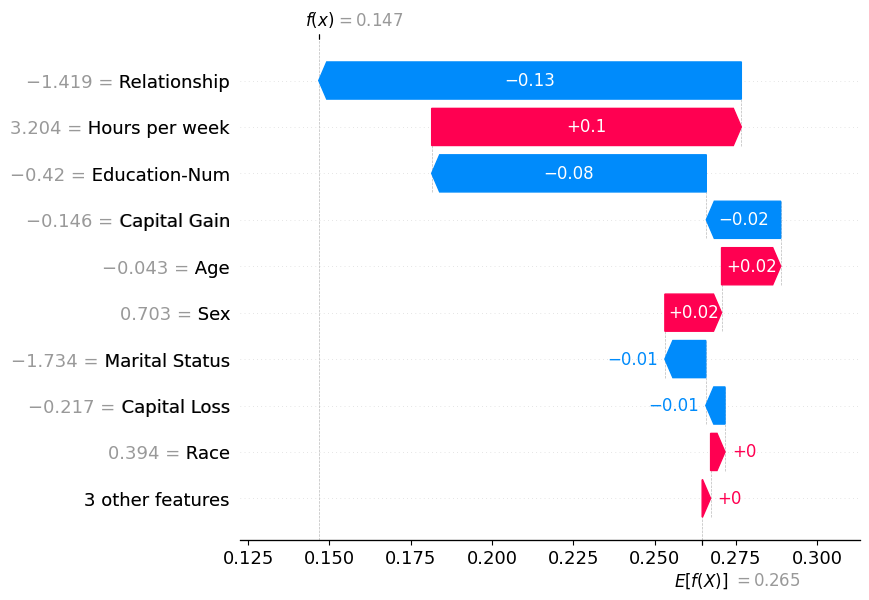

In [50]:
shap.plots.waterfall(shap_values[0], show=False)
plt.show()

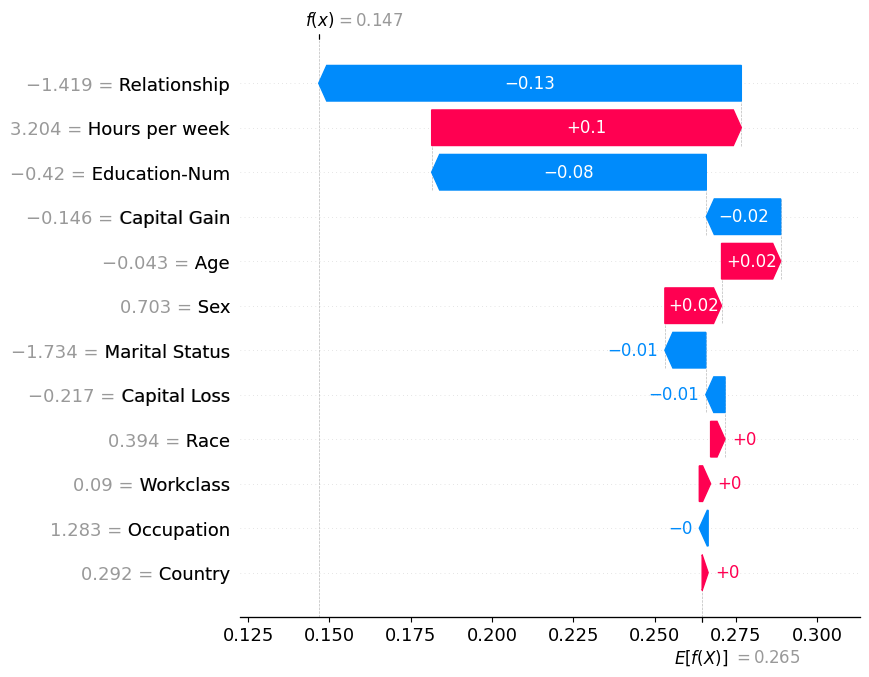

In [51]:
fig, ax = plt.subplots()
shap.plots.waterfall(shap_values[0], show=False, max_display=12)
plt.show()

### Explain many predictions

**Here we repeat the above explanation process for 20 individuals. Since we are using a sampling based approximation each explanation can take a couple seconds depending on your machine setup.**

In [52]:
shap_values50 = kernel_explainer(X.iloc[320:330, :])

  0%|          | 0/10 [00:00<?, ?it/s]

3238/3238 [==============================] - 13s 4ms/step


## Force plots

In [53]:
shap_values50

.values =
array([[ 0.03633197, -0.02760219, -0.09880248,  0.03734846, -0.00854889,
         0.04432003,  0.01132397,  0.00627537, -0.02353667, -0.01003177,
        -0.00025646,  0.00273009],
       [ 0.09459513,  0.00813546, -0.02018157,  0.04880861, -0.00200876,
         0.07406984,  0.00646389,  0.01594096, -0.01785409,  0.16472824,
         0.06050962,  0.00405332],
       [-0.00540149,  0.0038674 , -0.07518577, -0.0127431 ,  0.00634753,
        -0.14439338,  0.00639765,  0.00983525, -0.02319121, -0.00535101,
         0.01652521,  0.00062698],
       [-0.04053992,  0.00176142, -0.08008225, -0.03950403, -0.00250267,
        -0.06040377,  0.00452515, -0.01991679, -0.0200389 , -0.00463119,
        -0.00322464,  0.00171975],
       [ 0.02716878, -0.01391293,  0.16415142,  0.01798243, -0.00951308,
         0.05319302,  0.01220925,  0.01064842, -0.02535952, -0.01036368,
        -0.23107323,  0.00464954],
       [ 0.05649345, -0.0207536 , -0.09593507,  0.02127761, -0.00561202,
         0.0

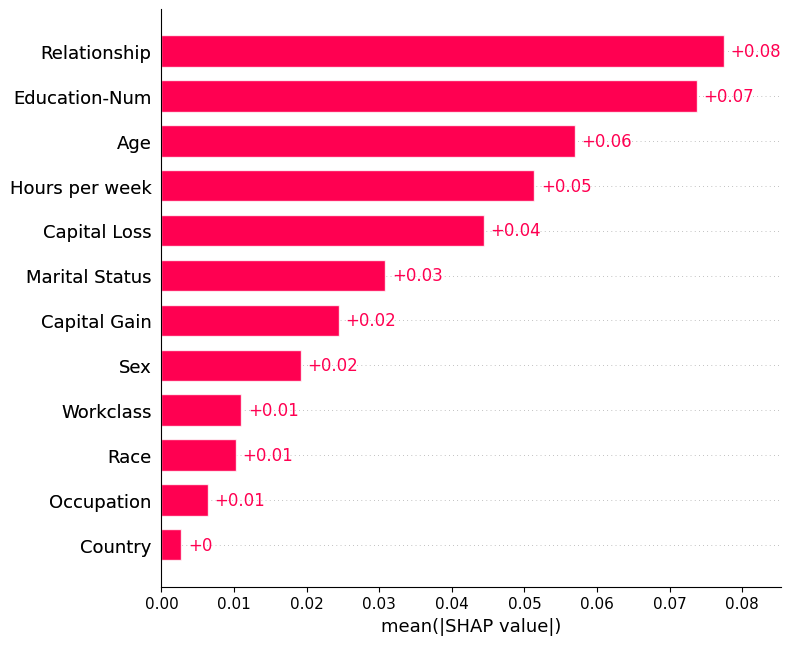

In [54]:
shap.plots.bar(shap_values50, max_display=12)

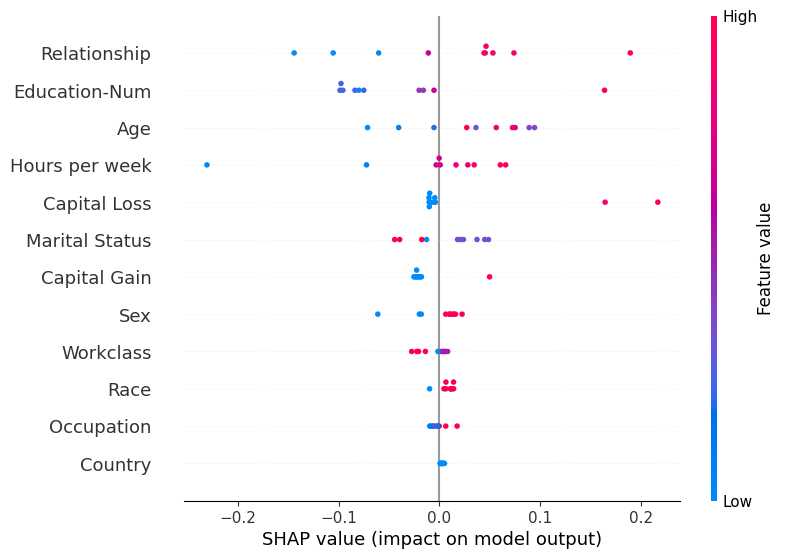

In [55]:
shap.plots.beeswarm(shap_values50, max_display=12)